In [ ]:
#hide
import sys
sys.path.append("..")

# FAIMED 3D

> fastai extension for medical 3d images including 3d transforms, datablocks and novel network architectures. 

## Install

`pip install faimed3d`

In contrast to fastai, which uses Pydicom to read medical images, faimed3d uses SimpleITK, as it supports more image formats.  
Currently faimed3d is build using the following versions of fastai, fastcore, nbdev, PyTorch, torchvision and SimpleITK

In [ ]:
import fastai
import fastcore
import nbdev
import torch
import torchvision

print('fastai:', fastai.__version__)
print('fastcore:', fastcore.__version__)
print('nbdev:', nbdev.__version__)
print('torch:', torch.__version__)
print('torchvision:', torchvision.__version__)
print('SimpleITK: 2.0.0rc3 (ITK 5.1)')

fastai: 2.1.10
fastcore: 1.3.12
nbdev: 1.1.5
torch: 1.7.0
torchvision: 0.8.1
SimpleITK: 2.0.0rc3 (ITK 5.1)


## Example 3D classification on the MRNet Dataset

In [ ]:
from faimed3d.all import *
from torchvision.models.video import r3d_18

In [ ]:
#hide
mrnet_data = pd.read_csv('../../mri-spa/data/train_knee.csv')

Defining paramteres for piecewise histogram scaling. Paramters can be obtained from dataloaders running `dls.standard_scale_from_dls()`

In [ ]:
std = tensor([173.06963,184.85706,197.57706,210.63336,225.09673,241.43134,260.64816,285.0106,320.0079,386.4354,562.08795])
percs = tensor([1,10,20,30,40,50,60,70,80,90,99,])

`faimed3d` keeps track of the metadata and stores it in a temporary directory. To avoid clutter, the tmpdir is emptied each time a new Dataloader is constructed

In [ ]:
dls = ImageDataLoaders3D.from_df(mrnet_data, '/media/..',
                                 item_tfms = ResizeCrop3D(crop_by = (0., 0.1, 0.1), resize_to = (20, 112, 112), perc_crop = True),
                                 rescale_method = PiecewiseHistScaling(percs, std),
                                 valid_col = 'is_valid',
                                 bs = 16, val_bs = 16)

Cleaning tmpdir.
removing 244 files from /tmp/faimed3d_metadata/
You can disable automatic cleanup of the tmpdir (e.g. when doing multiple sessions in parallel) with setting clean_tmpdir=False


Construct a learner similar to fastai, even transfer learning is possible using the pretrained resnet18 from torchvision.

In [ ]:
learn = cnn_learner_3d(dls, 
                       r3d_18,  
                       model_dir='/home/bressekk/Documents/faimed3d/nbs', 
                       metrics = [accuracy, RocAucBinary()])
learn = learn.to_fp16()

/home/bressekk/anaconda3/envs/fastai-v2/lib/python3.7/site-packages/fastai/learner.py:54: UserWarning: Could not load the optimizer state.
  if with_opt: warn("Could not load the optimizer state.")


SuggestedLRs(lr_min=0.002754228748381138, lr_steep=3.981071586167673e-06)

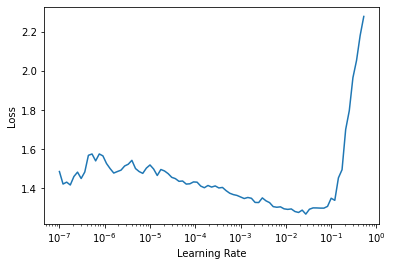

In [ ]:
#slow
learn.lr_find()